<img src="http://sct.inf.utfsm.cl/wp-content/uploads/2020/04/logo_di.png" style="width:60%">

<center>
    <h1> ILI285/INF285 Computación Científica </h1>
    <h1> Aritmética de punto flotante y pérdida de precisión</h1>
</center>

In [1]:
import numpy as np
import bitstring as bs
import matplotlib.pyplot as plt

# Números binarios

**Número binario**: Son aquellos números escritos en función te potencias de $2$. Se representan como:

$$
B = \cdots b_{2}\,b_{1}\,b_{0}.b_{-1}\,b_{-2}\cdots
$$

donde cada dígito o bit es 0 o 1.

Al igual que con los decimales, se escriben como potencias de 2:

$$
\begin{align}
(1001.11)_{2} &= 1\,2^{3}+0\,2^{2}+0\,2^{1}+1\,2^{0}+1\,2^{-1}+1\,2^{-2} \\
&= 8 + 0 + 0 + 1 + 0.5 + 0.25\\
&= 9 + 0.75\\
&= (9.75)_{10}
\end{align}
$$

Para transformar:
**Decimal a binario**: Separar parte entera y decimal.

Luego:

* Dividir la parte entera por 2 sucesivamente y almacenar el resto. El número binario se escibe en sentido contrario a como aparecieron.
    
* La parte fraccionaria se multplica por 2, y la parte entera son los digitos binarios.
    
**Ejemplo**: Transformemos $(53.7)_{10}$.

Comenzamos separando la parte entera y decimal. $(53.7)_{10} = 53 + 0.7$. La parte entera queda como:

$$
\begin{align}
53/2 &= 26,\,R = 1\\
26/2 &= 13,\,R = 0 \\
13/2 &= 6, \,R = 1 \\
6/2 &= 3,\, R= 0\\
3/2 &= 1,\, R = 1\\
1/2 &= 0, \,R = 1
\end{align}
$$

Por lo tanto la parte entera corresponde ser a $110101$ en binario. La parte decimal queda como:

$$
\begin{align}
0.7\times 2 &= 1+0.4,\,R = 1\\
0.4\times 2&=  0+0.8\,R = 0 \\
0.8\times 2 &= 1+0.6, \,R = 1 \\
0.6\times 2 &= 1+0.2,\, R= 1\\
0.2\times 2 &= 0+0.4,\, R = 0\\
&\vdots 
\end{align}
$$

Por lo tanto la parte decimal corresponde ser a $0.1\overline{0110}$. Finalmente el numero final $(53.7)_{10} = (110101.1\overline{0110})_{2}$

El algoritmo anterior funciona debido a:

* Sea $x$ el número, se separa en $x = n + d$, con $n >1$, $d \in (0,1)$.
* $n$ se divide por 2 y se toma el resto, es decir: $n = 2n_{0} + r_{0}$. Luego se realiza lo mismo con $n_{o}$:

$$
n_{0} = 2n_{1}+r_{1} \rightarrow n = 2(2n_{1} + r_{1}) + r_{0} \\
n = 2^{2} n_{1} + 2^{1}r_{1} + 2^{0}r_{0}
$$

Para la parte decirmal es al revés: $2d = d_{-1} + r_{-1} \rightarrow d = 2^{-1}d_{-1}+2^{-1}r_{-1}$, pero $2d_{-1} = d_{-2} + r_{-2}$, entonces:

$$
\begin{align}
d = 2^{-1}d_{-1} + 2^{-1}r_{-1} &= 2^{-1}(2^{-1}d^{-2} + 2^{-1}r^{-2}) + 2^{-1}r_{-1}\\
=& 2^{-2}d_{-2} + 2^{-2}r_{-2} + 2^{-1}r_{-1}
\end{align}
$$

y así sucesivamente.

**De binario a decimal**: Se separa la parte entera de la decimal. Luego:

* La parte entera se calcula con potencias de 2.
* La parte fraccionaria, si es finita, se puede usar potencias de 2 con exponente negativos. Si es periodica, se puede despalzar la parte periodica o aplicar serie geometrica.

**Ejemplo**:

Para la parte periódica, como se mencionó, se puede:
**Desplazar**: Tomemos $x = (0.\overline{1011})_{2} \rightarrow 2^{4} x = (1011.\overline{1011})_{2}$ Asi:

$$
2^{4}x -x = (1011.\overline{1011})_{2} - (0.\overline{1011})_{2} = (1011)_{2} = 11 \\
\therefore (2^{4} -1 )x = 11\\
\rightarrow x = \frac{11}{2^{4}-1} = \big(\frac{11}{15}\big)_{10}
$$
**Serie geométrica**: 

Recordar que:

$$
1 + r + r^{2} + \cdots = \displaystyle \sum_{i=0}^{\infty} r^{i} = \frac{1}{1-r}, \quad |r| < 1 
$$

Así, por ejemplo: $x = (0.\overline{10})_{2}$ es:

$$
x = (0.101010\cdots)_{2} = \displaystyle \sum_{i=0}^{\infty} 2^{-(2i+1)} = \displaystyle \sum_{i=0}^{\infty} 2^{-2i} 2^{-1} = \frac{1}{2} \displaystyle \sum_{i=0}^{\infty} (2^{-2})^{i},\,\,\,\, r = 2^{-2} = \frac{1}{4}\\
\therefore x = \frac{1}{2} \frac{1}{1-\frac{1}{4}} = \frac{1}{2} \frac{1}{\frac{3}{4}} = \frac{1}{2} \frac{4}{3} = \Big(\frac{2}{3}\Big)_{10}
$$

# Punto flotante 

* El standart actual es el IEEE754, el cual permite representar números reales.
* El números se componete de tres partes:
    * El signo (+/-)
    * Mantisa: bits significativos
    * Exponente de la base 2
* Su forma es:
$$
b = \underbrace{\pm}_{a}1.\underbrace{b_{1}b_{2}\cdots b_{n}}_{b} \times 2^{\overbrace{p}^{c}}
$$

(a) Signo
(b) Mantisa 
(c) Exponente

a todo lo anterior se le llama word/palabra

**Ejemplos**:
* $9 = (1001.0)_{2} = 1.001 \times 2^{3}$
* $0.95 = (0.11)_{2} = 11 \times 2^{-1}$

Los tamaños usuales son:
* Single (32): 1 bit signo, 8 exponente, 23 mantisa
* Double (64): 1 bit signo, 11 exponente, 52 mantisa
* Long double(80): 1 bit signo, 15 exponente, 64 mantisa

Cada forma funciona de manera equivalente. Todas funcionan en formanto **normalizado**, es decir, el bit entero es 1:

$$
b = \pm 1.b_{1}b_{2}\cdots b_{n} \times 2^{p}
$$

El bit más significativo se deja en 1 moviendo el exponente.

Notar que el $1$, tomando 64 bits es:

$$
1_{10} = \pm 1.00 \cdots 0 \times 2^{0} \rightarrow b_{i} = 0, \forall i \in \{1 \cdots 52\}
$$

El siguiente flotante más grande de 1 es:

$$
+ 1.00 \cdots 001 \times 2^{0} = 1\times 2^{0} + 2^{-52} \times 2^{0} = 1 + 2^{-52}
$$

**Machine epsilon**: Denotado como $\epsilon_{mach}$, se define como la distancia entre el 1 y el siguiente número flotante mayor que 1. Para el IEEE double precision, su valor es:

$$
\epsilon_{mach} = 2^{-52} \approx 2·10^{-16}
$$

Cuando un número binario tiene mas de 52 bits, los bits que no son almacenados pueden **truncarse** (descartar bits sobrantes) o **Redondearse** (aproximar de alguna forma, lo que hace IEEE754).

**Regla del redondeo al más cercano de IEEE**: Para doble precisión, si el bit 53 después del punto decimal:

* Es cero, se redondea hacia abajo (truncar).
* Si es uno, entonces:
    * Redondear hacia arriba (sumar 1 al bit 52) si los números después del bit 53 no son todos cero.
    * Si todos los bits después del bit 53 son cero, entonces se suma uno al bit 52 si y solo si es 1.

Denotaremos por $fl(x)$ el valor en punto flotante con **IEEE754**, con regla de redoneo al más cercano de un número real $x$.

#### Ejemplos

\begin{equation}
    −1.\underbrace{0001 \dots 0001}_{52 ~ \text{bits}}|1001\dots\cdot 2^8 \implies −1.\underbrace{0001 \dots 0010}_{52 ~ \text{bits}} \cdot 2^8
\end{equation}

Como los números a la derecha del bit $52$ no son todos $0$, simplemente se suma $1$ al bit $52$. Se debe considerar el acarreo correspondiente.

\begin{equation}
    +1.\underbrace{0001 \dots 0001}_{52 ~ \text{bits}}|1000\dots \cdot 2^5 \implies +1.\underbrace{0001 \dots 0010}_{52 ~ \text{bits}} \cdot 2^5 
\end{equation}

En este caso todos los bits después del bit $53$ son $0$, pero como el bit $52$ es $1$ entonces se le suma $1$.

\begin{equation}
    +1.\underbrace{1001 \dots 0100}_{52 ~ \text{bits}}|1000\dots\cdot 2^3 \implies +1.\underbrace{1001 \dots 0100}_{52 ~ \text{bits}} \cdot 2^3
\end{equation}

Para este ejemplo no se le suma $1$ al bit $52$ debido a que los que aparecen a la derecha del bit $53$ son puros $0$.

**Error absoluto y relativo**: Sea $x_{c}$ la versión comptutada de un valor real $x$, entonces:

* Se define el **error absoluto** como $|x_{c} - x|$
* Se define el **error relativo** como $\frac{|x_{c}-x|}{|x|}$, si existe dicho valor.

**Cota de redondeo**: Sea $fl(x)$ el valor aproximado para un modelo de punto flotante de $x$. Entonces:

\begin{equation}
    \frac{|fl(x) - x|}{|x|} \leq \frac{1}{2} \cdot \epsilon_{mach} 
\end{equation}

o de manera análoga

\begin{equation}
    |fl(x) - x| \leq \frac12 \cdot \epsilon_{mach} |x|
\end{equation}

Esto quiere decir que la distancia entre la representación de punto flotante y el número $x$ es proporcional a la magnitud del real $x$.

**Demostración**: Tomemos $x=1.b_{1}b_{2}\dots b_{52} b_{53} \dots \times 2^{p}$ y $fl(x) = 1.b_{1}b_{2}\dots b_{52} \times 2^{p}$. Tenemos:

* Si $b_{53} = 0 \rightarrow b{i} = e_{i}$ y $x > fl(x)$:

$$
\begin{align}
0 < x - fl(x) &= 1.b_{1}b_{2}\dots b_{52} \dots 2^{p} - 1.b_{1}b_{2}\dots b_{52} \times 2^{p}\\
&=0.000\dots 0 b_{53} \dots \times 2^{p}\\
&=0.b_{53} \dots \times 2^{p-52}\\
&= b_{53}.b_{54} \dots \times 2^{p-1} \epsilon_{mach}\text{, como } b_{53} < 1 \\
&\leq 2^{p-1} \epsilon_{mach}
\end{align}
$$

* Si $b_{53} = 1 \rightarrow$ Redondeo: $fl(x) = 1.b_{1}b_{2} \dots b_{52} \times 2^{p} + \epsilon_{mach} \times 2^{p}$

$$
\begin{align}
0 < fl(x) - x &= 1.b_{1}b_{2}\dots b_{52} \times 2^{p} + \epsilon_{mach} \times 2^{p} - 1.b_{1}b_{2}\dots b_{52} \dots \times 2^{p}  \\
&= (e_{mach} - 0.00 \dots 0 b_{53} \dots ) \times 2^{p}\\
&= (e_{mach} - 0. b_{53} \dots \times 2^{-52}) \times 2^{p} \\
&= (1-0.b_{53} \dots) \times 2^{p} \epsilon_{mach}
\end{align}
$$

$$
\begin{align}
\text{Como } 0.b_{53}\dots \geq 0.5 \iff -0.5 &\geq -0.b_{53}\dots\,\,\, /+1\\
1 - \frac{1}{2} &\geq 1 -0.b_{53}\dots\\
\frac{1}{2} &\geq 1 -0.b_{53}\dots
\end{align}
$$

$$
\therefore 0 < fl(x) - x \leq \frac{1}{2} 2^{p} \epsilon_{mach} = 2^{p-1} \epsilon_{mach}
$$

La definición de valor absoluto nos dice:

$$
|a|\geq b\iff a\leq -b\ \lor a \geq b
$$

En nuestro caso 

$$
\begin{align}
x - fl(x) \leq  2^{p-1} \epsilon_{mach} \lor fl(x) - x &\leq  2^{p-1} \epsilon_{mach} \\
x - fl(x) \leq  2^{p-1} \epsilon_{mach} \lor  - 2^{p-1} \epsilon_{mach}  &\leq  x - fl(x) 
\end{align}
$$
Por lo que obtenemos:

$$
|x-fl(x)| \leq 2^{p-1} \epsilon_{mach}
$$

Además: $|x| = 1. b_{1} \dots b_{52} \dots \times 2^{p} \geq 2^{p} \iff \frac{1}{|x|} \leq \frac{1}{2^{p}}$.

Finalmente obtenemos:

$$
\frac{|x-fl(x)|}{|x|} \leq \frac{2^{p-1} \epsilon_{mach}}{2^{p}} = \frac{1}{2} \epsilon_{mach}
$$

**La estructura de un número de punto flotante**, considerando 64 bits u 8 bytes es:

**Word**: 

| $\text{Signo}$ | $\text{Exponente}$   | $\text{Mantisa}$ |
|------|------| ----|
| 1 bit| 11 bits | 52 bits | 
|   $s$  | $e_{1}$ ... $e_{n}$ | $b_{1}$ ...  $b_{52}$ |

La estructura de cada parte es:

* **Signo**: Solo es un bit, por lo que es 0 o 1. Se toma que 0 es positivo y 1 es negativo
* **Exponente**: Como son 11 bits, hay $2^{11} = 2048$ combinaciones sin embargo, el 0 y el 2047 son usados para propósitos especiales. El rango disponible es [1,2046]. Se usa **Exponent bias**, que mapea el rango disponible (positivo, para almacenar en binario) a un rango con valores positivos y negativos.

La regla para encontrar el bias mediante el standart IEEE-754 es: 

$$K = 2^{n-1} - 1,$$ 

donde $n$ es el número de bits.

Exponent bias para **Double**: 

$2^{11-1} - 1 = 2^{10} - 1 = 1024 - 1 = 1023 $

$p \in [ 1- 1023, 2046-1023] = [-1022,1023]$

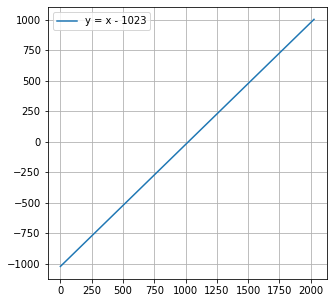

In [13]:
y = lambda x: x - 1023
points = np.linspace(1,2026,100)

plt.figure(figsize=(5, 5))
plt.plot(points,y(points),label = r"y = x - 1023")
plt.grid(True)
plt.legend()
plt.show()

In [55]:
#n = '000000000000'
n = '11111111101'
print("Exponente sin shift",int(n,2))
if int(n,2) == 2047 or int(n,2) == 0:
    print("Caso especial!")
else:
    print("Exponente con shift",int(n,2)-1023)
    print("2**"+str(int(n,2)-1023))

Exponente sin shift 2045
Exponente con shift 1022
2**1022


Además, es importante recalcular que los bits del exponente se almacenan en orden inverso, es decir:

$p: e_{1}e_{2}\cdots e_{11} \rightarrow \overline{p} = e_{1}2^{10} + e_{2}2^{9} + \cdots + e_{11} 2^{0} - 1023$

**Nota**: Como el número es almacenado en potencias de 2, los intervalos y la cantidad de números representable en estos intervalos son más grandes.

**Casos especiales del exponente**: 

* **P=2047**: es decir, p = $11111111111$. En este caso, se designan números o valores "especiales":

| $s$ | $e_{1}\,e_{2}\,e_{3}$ ... $e_{11}$   |  $b_{1}\,b_{2}\,b_{3}$ ... $b_{52}$ | Lo que representa|
|------|------| ----| ---- |
| 0| 1 1 1 ... 1  | 0 0 0 ... 0  | $+ \infty$ |
| 1| 1 1 1 ... 1  | 0 0 0 ... 0  | $- \infty$ |
| 1| 1 1 1 ... 1  | x x x ... x  | NaN |

* **P=0**: Se utilza el formato **Non-normalized floating point number**, que son los números:

$$
\pm 0.b_{1} b_{2} \cdots{...} b_{52} \times 2^{-1022} 
$$

Así, con esto el número 0 se representa de dos formas:

$$
+0: S = 0, e_{i} = 0, b_{i} = 0 \\
-0: S = 1, e_{i} = 0, b_{i} = 0
$$

In [2]:
def next_float(f):
    #packing double-precision foat
    b = bs.pack('>d', f)
    
    #extracting mantisa as unsigned int
    #and adding up 1
    m = b[12:].uint
    m += 1
    
    #putting the result in his place
    b[12:] = m
    
    return b.float

def epsilon(f):
    next_f = next_float(f)
    return next_f - f

def to_binary(f):
    b = bs.pack('>d', f)
    b = b.bin
    #show sign + exponent + mantisa
    print(b[0]+' '+b[1:12]+ ' '+b[12:])

In [3]:
int('01111111111',2) - 1023

0

In [4]:
to_binary(2**53+4)

0 10000110100 0000000000000000000000000000000000000000000000000010


In [5]:
"0 10000110100 0000000000000000000000000000000000000000000000000001|1"

'0 10000110100 0000000000000000000000000000000000000000000000000001|1'

**Ejemplo 1**:


\begin{align}
1.00\dots0 \times 2^{0} + 1.00\dots0 \times 2^{-53} &=  \\
&= 1.0000000000000000000000000000000000000000000000000000|0 \times 2^{0}\\
&+ 0.0000000000000000000000000000000000000000000000000000|1 \times 2^{0}\\
&----------------------------------\\
&= 1.0000000000000000000000000000000000000000000000000000|1 \times 2^{0}
\end{align}

El resultado es igual a $1$ y esperabamos $1 + 2^{-53}$

**Ejemplo 2**:


\begin{align}
1.00\dots0 \times 2^{0} + 1.10\dots0 \times 2^{-52} &=  \\
&= 1.0000000000000000000000000000000000000000000000000000|0 \times 2^{0}\\
&+ 0.0000000000000000000000000000000000000000000000000001|1 \times 2^{0}\\
&----------------------------------\\
&= 1.0000000000000000000000000000000000000000000000000001|1 \times 2^{0}\\
&= 1.0000000000000000000000000000000000000000000000000010 \times 2^{0}
\end{align}

El resultado es igual a $1+2^{-51}$ y el valor esperado era $1+2^{-52}+2^{-53}$

**Perdida de significancia**: Ocurre cuando se restan valores muy cercano, pero debido a la representación flotante su diferencia da cero. Esto se corrige con una manipulación algebraica.

**Ejemplo**:

Veamos que sucede con:

$$
E1 = \frac{1-cos(x)}{sin(x)^{2}}
$$

In [91]:
np.cos(10**-8)

1.0

In [92]:
def E1(x):
    return((1-np.cos(x))/np.sin(x)**2)

In [95]:
E1(10**-8)

0.0

Volvamos a escribir el problema:

$$
\frac{1-cos(x)}{sin(x)^{2}} \frac{1+cos(x)}{1+cos(x)} = \frac{1^{2} - cos(x)^{2}}{sin(x)^{2}(1+cos(x))}= \frac{sin(x)^{2}}{sin(x)^{2}(1+cos(x))} = \frac{1}{1+cos(x)} = E2
$$


In [96]:
def E2(x):
    return(1/(1+np.cos(x)))

In [98]:
E2(10**-9)

0.5

**Ejemplo**:

$$
f(x) = \frac{1-(1-x)^{3}}{x}
$$

In [104]:
def f(x):
    return((1-(1-x)**3)/x)

In [111]:
f(10**-17)

0.0

$$
f(x) = \frac{x^3 - 3 x^2 + 3 x}{x} = \frac{x(x^2 - 3 x + 3)}{x} = (x^2 - 3 x + 3)
$$

In [112]:
def f2(x):
    return(x**2 - 3*x + 3)

In [115]:
f2(10**-18)

3.0

## Ejemplo


Generar la línea recta con la representación de todos los números considerando:
* 1 bit para el signo
* 2 bits para la mantisa
* 3 bits para el exponente

En este caso tenemos la siguiente representación:

| $\text{Signo}$ | $\text{Exponente}$   | $\text{Mantisa}$ |
|------|---------| ----|
| 1 bit| 2 bits | 2 bits | 
|   $s$ | $e_{1}$$e_{2}$$e_3$ | $b_{1}$$b_{2}$ |

Con esto podemos representar números como:

\begin{equation}
    b = \pm 1.b_1b_2\times 2^p
\end{equation}

Para los valores exponente podemos representar $2^3=8$ valores, omitiendo el $0$ y $7$ para los casos especiales, solo podemos usar $[1, 2, \dots, 6]$. Calculando el bias obtenemos:

\begin{equation}
    \begin{split}
        K & = 2^{n-1} - 1 \\
         & = 2^2 - 1 \\
         & = 3,
    \end{split}
\end{equation}

es decir, $p\in[1-3, 6-3] = [-2,3]$

* ¿Cuál es el primer entero no representable para este caso? ¿En double precisión?

En el caso del primer entero no representable para el **ejemplo** tenemos:

\begin{equation}
    +1.11 \cdot 2^p,
\end{equation}
que es igual a 

\begin{equation}
    (2^{0} + 2^{-1} + 2^{-2}) \cdot 2^p.
\end{equation}

Para $p=2$ tenemos:

\begin{equation}
    (2^{0} + 2^{-1} + 2^{-2}) \cdot 2^2 \\
    2^2 + 2^1 + 2^0,
\end{equation}

hasta acá todo bien, pero ahora para el caso $p=3$

\begin{equation}
    (2^{0} + 2^{-1} + 2^{-2}) \cdot 2^3 \\
    2^3 + 2^2 + 2^1,
\end{equation}

o sea no alcanzamos a representar $\mathbf{2^3+1}$.

En el caso de **doble precisión**, utilizando el mismo argumento anterior, veamos la siguiente situación:
\begin{equation}
    +1.1111\dots 1111\cdot 2^p,
\end{equation}

esto es 
\begin{equation}
    (2^{0} + 2^{-1} + 2^{-2} + \dots + 2^{-52}) \cdot 2^p.
\end{equation}

Para $p=52$, tenemos

\begin{equation}
        (2^{0} + 2^{-1} + 2^{-2} + \dots + 2^{-52}) \cdot 2^{52} \\
        2^{52} + 2^{51} + 2^{50} + \dots + 2^{0}
\end{equation}

Hasta acá no tenemos problemas para representar enteros consecutivos gracias a $2^0$, pero veamos el siguiente caso. Para $p=53$, tenemos

\begin{equation}
        (2^{0} + 2^{-1} + 2^{-2} + \dots + 2^{-52}) \cdot 2^{53} \\
        2^{53} + 2^{52} + 2^{51} + \dots + 2^{1}
\end{equation}

En este último caso ya no podemos representar números consecutivos, puesto a que para el bit $b_{52}$ siempre podremos sumar como mínimo $2$. De esta forma el primer valor entero que no podríamos representar sería $\mathbf{2^{53} + 1}$.

* ¿Cuál es $\epsilon_{\text{mach}}$ para este caso?

El número $1$ se puede representar como $1.00 \times 2^0$ y el siguiente valor es $1.01 \times 2^0$, esto quiere decir que:

\begin{equation}
    \epsilon_{mach}=1.01 \times 2^0 - 1.00 \times 2^0 = 0.01 \times 2^0 = 1.00 \times 2^{-2},
\end{equation}

o sea $\epsilon_{mach}=2^{-2}$

* ¿Cuál es el menor número representable?

Utilizando esta representación, el número más pequeño que se puede representar con $p=-2$ es:

\begin{equation}
    \begin{split}
        b & = 0.01\times 2^{-2} \\
        b & = 2^{-4}
    \end{split}
\end{equation}

<img src="img/recta.png">
<center><em>Recta de números representados por el ejemplo.</em></center>

## Ejemplos experimentales

In [2]:
def next_float(f):
    #packing double-precision foat
    b = bs.pack('>d', f)
    
    #extracting mantisa as unsigned int
    #and adding up 1
    m = b[12:].uint
    m += 1
    
    #putting the result in his place
    b[12:] = m
    
    return b.float

def epsilon(f):
    next_f = next_float(f)
    return next_f - f

def to_binary(f):
    b = bs.pack('>d', f)
    b = b.bin
    #show sign + exponent + mantisa
    print(b[0]+' '+b[1:12]+ ' '+b[12:])

In [7]:
to_binary(53.7)

0 10000000100 1010110110011001100110011001100110011001100110011010


In [10]:
epsilon(1)

2.220446049250313e-16

In [11]:
#values between 10**-32 and 10**+32
values = np.array([10**i for i in range(-32,32)]).astype(float)

#corresponding epsilons
vepsilon = np.vectorize(epsilon)
eps = vepsilon(values)

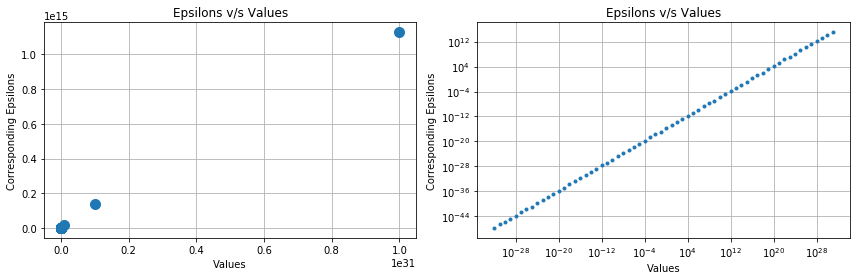

In [12]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(values, eps,'.',markersize=20)
plt.xlabel('Values')
plt.ylabel('Corresponding Epsilons')
plt.title('Epsilons v/s Values')
plt.grid(True)
plt.subplot(1, 2, 2)
plt.loglog(values, eps,'.')
plt.xlabel('Values')
plt.ylabel('Corresponding Epsilons')
plt.title('Epsilons v/s Values')
plt.grid(True)
plt.tight_layout()
plt.show()

<img src="img/ej2.png">

* a) Si trabajamos con 11 bits en el exponente tenemos: $2^{11}$ = 2048 combinaciones de números. Por lo tanto trabajariamos entre [0,2047]. Pero como existen casos especiales para el 0 y el 2047 el rango en el que nos podriamos mover sería de [$1\dots2046$]. Calculando el shift utilizando la formula $2^{n-1} - 1$ obtenemos que es : 1023 quedandonos así el el rango de los exponentes igual a [$-1022\dots1023$].

    Realizando el mismo estudio pero para 6 bits dada la perdida de 5 bits trabajariamos con un total de $2^{6}$ combinaciones de números. Por lo tanto el rango en que se mueve el exponente es igual a [0,63]. Descartando los casos especiales obtenemos que el rango es [1,62]. Calculando el shift ($2^{6-1}-1$) = 31 obtenemos que el rango de los exponentes queda como [-30,31]. Este esta dentro del rango que necesita tony stark por lo que recomiendo asignar los bits sobrantes a la mantisa para tener mas presición.
    
* b) $2^{-47}$. Ya que el ultimo bit de la mantisa es el 47. ($1.00\dots\underbrace{1}_{47} x 2^{0}- 1.00\dots\underbrace{1}_{47} x 2^{0}$)

* c) Utilizando notación subnormal el menor número representable menor que 0 es el $2^{-47} 2^{-1022}$. Ya que este se representa como $0.00\dots\underbrace{0}_{47} x 2^{-1022}$

* d) El ($2^{31} + 2^{30} \dots 2^{0}$) + 1. Esto es debido a que cuando estamos trabajando con el exponente 31 que es el maximo exponente que podemos representar el ultimo entero exacto que podemos representar es $1.\underbrace{1111111111111111111111111111111}_{31\,1s}\underbrace{00000000000000000000}_{20\,0s} x 2^{31}$. Notar que todos los bits que estan en 0 representan números decimales, en especifico representan la suma de las potencias ($2^{-1}+2^{-2}\dots 2^{-21})$. Esto equivale a una serie geometrica no infinita.

$$
\displaystyle \sum_{k=0}^{n} r^{k} = \frac{1-r^{n+1}}{1-r} = \frac{1-(\frac{1}{2})^{21}}{1-\frac{1}{2}} = 1.9999999
$$

    A este hay que restarle 1 por que no estoy considerando la suma desde 1 sino que desde $2^{-1}$ por lo tanto el resultado es $0.9999\neq 1$. Esto significa que para poder representar $2^{31} + 2^{30} \dots 2^{0}$) + 1 debemos hacer uso de $2^{32}$ pero no es posible representar.
    
e) Utilizando notación subnormal el menor número representable menor que 0 es el $2^{-52} 2^{-31}$. Ya que este se representa como $0.00\dots\underbrace{1}_{52} x 2^{-31}$

<img src="img/ej3.png">

| $\text{Signo}$ | $\text{Exponente}$   | $\text{Mantisa}$ |
|------|---------| ----|
| 1 bit| 3 bits | 4 bits | 
|   $s$ | $e_{1}$$e_{2}$$e_3$ | $b_{1}$$b_{2}$$b_{3}$ $b_{4}$  |

1) $2^{-4}$. Ya que el ultimo bit de la mantisa es el 4. ($1.000\underbrace{1}_{4} x 2^{0}- 1.000\underbrace{0}_{4} x 2^{0}$)

2) Realizando el shift al itervalo [1,6] obtenemos [-2,3]. Por lo tanto el menor número representable es $2^{-4}\,2^{-2} = 2^{-6}$

3) Primero lo llevaremos a la forma normal.

$$
1.1100|1100 \dots \times 2^{-1}
$$

Utilizando las reglas de la IEEE tenemos:

$$
1.1101 \times 2^{-1}
$$

Ese número en decimal equivale a ($2^{-1}+2^{-2}+2^{-3}+2^{-5}$) = $0.90625$.

Calculando el error relativo tenemos:

$$
\frac{|0.90625-0.9|}{0.9} = 0.00694444444444442 < \frac{1}{2} 2^{-4} = 0.03125
$$

4) **Correción**

Caso 1:

$$
l1 = \frac{1}{2} \cdot \frac{1}{2} = \frac{1}{4} \\
l2 = \frac{1}{16} \cdot \frac{1}{16} = \frac{1}{2^{8}}\\
$$

$$
l3  =
\begin{align*}
1&.0000 \times 2^{-2}\\
+1&.0000 \times 2^{-8}\\
\end{align*}
$$

Eso es equivalente a: 

$$
\begin{align*}
1&.000000000 \times 2^{-2}\\
+0&.000001000 \times 2^{-2}\\
-&--------\\
1.&000001000 \times 2^{-2}
\end{align*}
$$

Pero como podemos almacenar solo 4 digitos en la mantisa tenemos como resultado:

$$
1.0000 \times 2^{-2} = \frac{1}{4}
$$
Finalmente out es $\frac{1}{2}$ luego de aplicar la raiz.

Caso 2:
$$
M = \frac{1}{2}\\
m = \frac{1}{16}\\
\frac{m}{M} = \frac{\frac{1}{16}}{\frac{1}{2}} = \frac{1}{8}\\
l4 = \frac{1}{8}\cdot\frac{1}{8} = \frac{1}{64} = \frac{1}{2^6}
$$

$$
l5 = 
\begin{align*}
1&.0000\times2^{0}\\
+0&.0001\times2^{-2}
\end{align*}
$$

Eso es equivalente a:
$$
\begin{align}
1&.000000\times2^{0}\\
+0&.000001\times2^{0}\\
-&------\\
1&.000001 \times2^{0}
\end{align}
$$

Pero como podemos almacenar solo 4 digitos en la mantisa tenemos como resultado:

$$
1.0000 \times 2^{0}
$$
Luego:
$$
l6 = \sqrt{1} = 1
$$

Finalmente out corresponde ser a $M \times l6 = \frac{1}{2}$

<img src="img/ej1.jpg">

In [118]:
2**3 + 2**-3

8.125

In [119]:
2**-3

0.125